In [13]:
import numpy as np      # Manejo de arreglos (álgebra lineal en Python)
import pandas as pd     # Manejo de Dataframes (tipo de datos)
import matplotlib.pyplot as plt   # Gráficas
import seaborn as sns     ## gráficas estadísticas (histogramas)

In [14]:
url='https://docs.google.com/spreadsheets/d/e/2PACX-1vSoleTscHZCrVRMTbAc31GFXwMG6LF6oKEa4G_Ff45i-InKpDpzSfPSn43PAMeINbC3gEX0V7POhA7V/pub?output=csv'
data= pd.read_csv(url)
X=data.values


In [15]:
from sklearn.cluster import KMeans

kmeans_mas = KMeans(n_clusters=4, random_state=42, init='k-means++')
clusters_kmeans_mas = kmeans_mas.fit_predict(X)
centroides_kmeans_mas=kmeans_mas.cluster_centers_

In [16]:
# Añadir los clusters al DataFrame original
data['Cluster'] = clusters_kmeans_mas

In [17]:
from sklearn.decomposition import PCA
# Crear un objeto PCA y ajustar los datos
pca = PCA(n_components=3)  # Queremos las tres primeras componentes principales
X_pca = pca.fit_transform(X)

In [18]:
def graficar_clusters_PCA2D(clusters, metodo, centroids):
    # Crear un gráfico de dispersión 2D usando las dos primeras componentes
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1],
                    hue=clusters, palette='Set1',
                    alpha=0.8, s = 100)
    plt.scatter(centroids[:,0], centroids[:,1], c= 'black', s = 100, label = 'centroides')
    plt.title(f'Visualización 2D de la Clusterización (PCA) {metodo}', fontsize=16)

    plt.xlabel('Componente Principal 1')
    plt.ylabel('Componente Principal 2')
    plt.grid(True)
    plt.grid(linestyle = '-', alpha  = 0.5)
    plt.legend(title='Cluster')
    plt.show()


In [19]:
centroides_kmeans_mas_pca=pca.transform(centroides_kmeans_mas)
centroides_kmeans_mas_pca

array([[-18.92261285, -51.15290841, -19.91868549],
       [207.53624617, -14.95768587,  30.71744999],
       [  1.7006178 ,  51.9204732 , -17.30972911],
       [-57.46487019,   5.86526214,  22.12620196]])

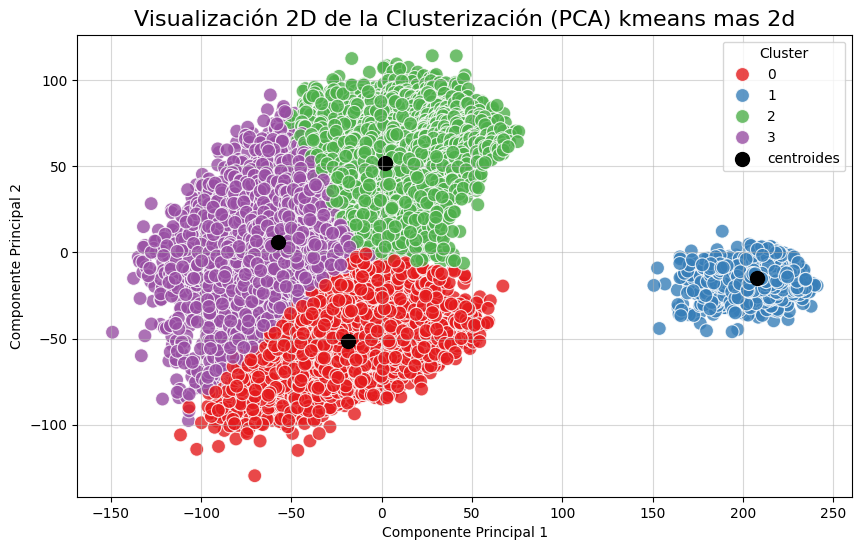

In [23]:
kmeans_2D=graficar_clusters_PCA2D(clusters_kmeans_mas, 'kmeans mas 2d', centroides_kmeans_mas_pca)

In [24]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import seaborn as sns

def graficar_clusters_PCA3D(clusters, metodo):
    # Crear el gráfico 3D
    fig = plt.figure(figsize=(15, 8))
    ax = fig.add_subplot(111, projection='3d')

    # Graficar los puntos con borde blanco
    scatter = ax.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2],
                         c=clusters, cmap='Set1', s=100,
                         edgecolor='white', alpha=0.8)

    # Etiquetas de los ejes y título
    ax.set_title(f'Visualización 3D de la Clusterización (PCA) {metodo}', fontsize=16)
    ax.set_xlabel('Componente Principal 1')
    ax.set_ylabel('Componente Principal 2')
    ax.set_zlabel('Componente Principal 3')

    # Añadir la leyenda
    legend1 = ax.legend(*scatter.legend_elements(), title="Clusters")
    ax.add_artist(legend1)

    # Mostrar el gráfico
    plt.show()



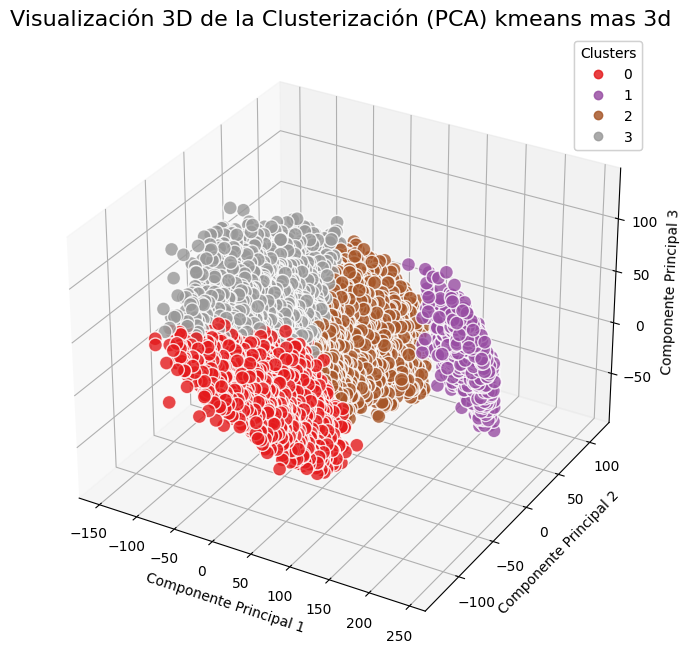

In [25]:
kmeans_3D= graficar_clusters_PCA3D(clusters_kmeans_mas, 'kmeans mas 3d')